###### Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into pandas and into reasonable shape so that you can make these histograms?
Inspect the Data!
1.
The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?




# Scatter plot of state0

   Unnamed: 0       State  TotalPop             Hispanic                White  \
0           0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1           1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2           2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3           3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4           4  California  38421464  37.291874687968054%   40.21578881677474%   
5           5    Colorado   5278906   20.78438003220608%   69.89557165861504%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   
5   3.546376811594

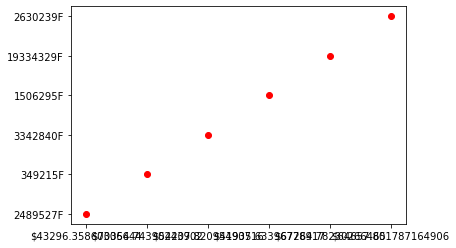

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("states0.csv")
print (df)
df[["male","women"]] = df["GenderPop"].str.split("_",n=1,expand = True) 
plt.scatter(df["Income"],df["women"],c ="red", label = "x-axis is INCOME")
plt.show()


# Scatter plot of state1

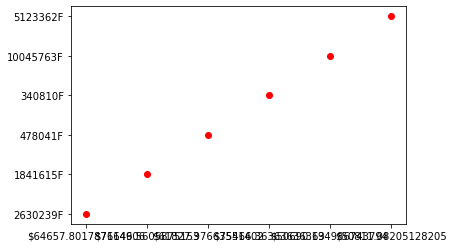

In [3]:
df = pd.read_csv("states1.csv") 
df[["male","women"]] = df["GenderPop"].str.split("_",n=1,expand = True) 
plt.scatter(df["Income"],df["women"],c ="red", label = "x-axis is INCOME")
plt.show()


In [5]:
'''2.
It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames
together into one DataFrame, called something like us_census.'''
import glob
us_census = pd.concat(map(pd.read_csv,glob.glob("states*.csv")))
us_census.drop(us_census.columns[us_census.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
us_census.head(7)




,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F


In [6]:
'''3.
Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you 
as you try to make histograms?

4.
Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of 
integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.

Regex to the Rescue

'''
print(us_census.columns)
print(us_census.dtypes)
#print(us_census.head())
###########################################
'''5.
Use regex to turn the Income column into a format that is ready for conversion into a numerical type.'''
import re


us_census["Income"]=us_census["Income"].replace(r'[/$]'," " ,regex =True)

us_census["Income"]=pd.to_numeric(us_census["Income"])

us_census["Income"].dtype

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')
State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


dtype('float64')

In [7]:
''''6.
Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.
Split the column into those two new columns using str.split and separating out those results.'''

us_census[["Men","Women"]] = us_census["GenderPop"].str.split("_",n=1,expand = True) 
us_census.head(10)

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088M,3342840F
3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913M,1506295F
4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135M,19334329F
5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667M,2630239F
0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667M,2630239F
1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607M,1841615F
2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413M,478041F
3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674M,340810F


In [8]:
'''7.
Convert both of the columns into numerical datatypes.

There is still an M or an F character in each entry! We should remove those before we convert.'''

us_census["Men"]=us_census["Men"].replace(r'[/M]' ,"" , regex =True)
us_census["Women"]=us_census["Women"].replace(r'[/F]' ,"" , regex= True)
us_census["Men"]= us_census["Men"].apply(pd.to_numeric)
us_census["Women"]=us_census["Women"].apply(pd.to_numeric)

print(us_census[["Men","Women"]].dtypes)

Men        int64
Women    float64
dtype: object


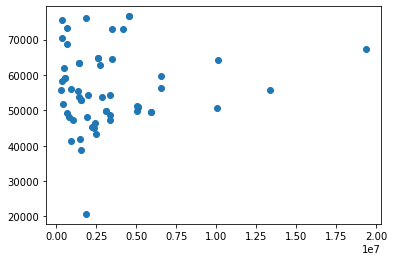

In [9]:
'''
8.
Now you should have the columns you need to make the graph and make sure your boss does not 
slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!
plt.scatter(the_women_column, the_income_column) 
Remember to call plt.show() to see the graph!
'''
plt.scatter(us_census["Women"],us_census["Income"]) 
plt.show() 


In [10]:
'''9.
Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with
the number of women per state to see.We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, 
you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked! '''

est =us_census["TotalPop"] - us_census["Men"]
print(len(est))

us_census["Women"]=us_census["Women"].fillna(0)
#print(us_census["Women"])

60


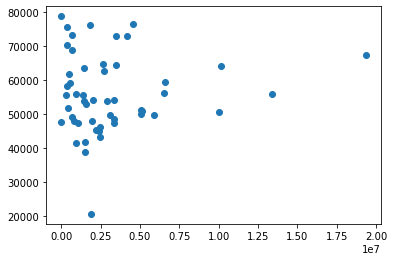

In [32]:
'''
10.We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.
11.Drop those duplicates using the .drop_duplicates() function.
12.Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

'''
us_census.drop_duplicates(subset=None, keep="first", inplace=True)
plt.scatter(us_census["Women"],us_census["Income"]) 
plt.show() 



In [33]:
'''
Histograms of Races
13.
Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again 
to see what the race categories are.
'''
us_census.columns


Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

Hispanic    0
White       0
Black       0
Native      0
Asian       0
Pacific     3
dtype: int64
0


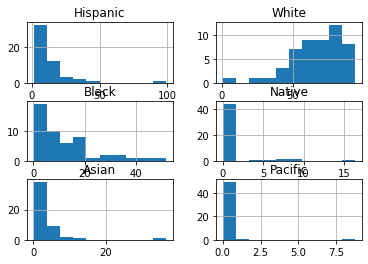

In [34]:
'''
14.
Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably
dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

Get Creative'''
us_census[["Hispanic","White","Black","Native","Asian", "Pacific"]]=us_census[["Hispanic","White","Black","Native","Asian", "Pacific"]].replace(r'[/%]' ,"" , regex =True).apply(pd.to_numeric)
us_census[["Hispanic","White","Black","Native","Asian", "Pacific"]]=us_census[["Hispanic","White","Black","Native","Asian", "Pacific"]].fillna(0)
us_census[["Hispanic","White","Black","Native","Asian", "Pacific"]].hist()
print(us_census[ ["Hispanic","White","Black","Native","Asian", "Pacific"] ].apply(lambda x : x.duplicated().sum() ) )
print(us_census.duplicated().sum())

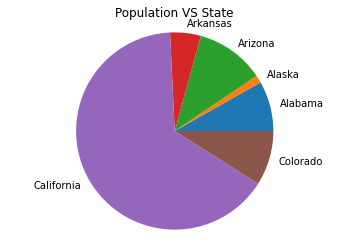

In [697]:
'''15.
Phew. You’ve definitely impressed your boss on your first day of work.

But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even 
more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

'''
df=us_census["TotalPop"][0:6]
my_labels= "Alabama","Alaska","Arizona","Arkansas","California","Colorado"
plt.pie(df,labels=my_labels)
plt.title('Population VS State')
plt.axis('equal')
plt.show()


In [36]:
'''PART 2:

LEARN DATA ANALYSIS WITH PANDAS
Petal Power Inventory
You’re the lead data analyst for a chain of gardening stores called Petal Power. Help them analyze their inventory!
Answer Customer Emails
1.
Data for all of the locations of Petal Power is in the file inventory.csv. Load the data into a DataFrame called inventory.
'''
inventory = pd.read_csv("inventory.csv")


In [37]:
'''2.
Inspect the first 10 rows of inventory.
3.
The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.
'''
inventory.head(10)
Staten_Island = inventory.head(10)


In [38]:
'''4. A customer just emailed you asking what products are sold at your Staten Island location. 
Select the column product_description from staten_island and save it to the variable product_request.
'''
product_request = inventory["product_type"]


In [39]:
'''5.
Another customer emails to ask what types of seeds are sold at the Brooklyn location.
Select all rows where location is equal to Brooklyn and product_type is equal to seeds 
and save them to the variable seed_request
'''
seed_request = inventory[(inventory.location == 'Brooklyn') & (inventory.product_type == 'seeds')]

In [40]:
'''Inventory
6.
Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.
'''
inventory["in_stock"] = inventory["quantity"].apply(lambda x: True if x >0 else False)


In [41]:
'''7.
Petal Power wants to know how valuable their current inventory is.

Create a column called total_value that is equal to price multiplied by quantity.'''
inventory["total_value"] =  inventory["price"]*inventory["quantity"]
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
5,Staten Island,garden tools,spade,93,19.99,True,1859.07
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47


In [43]:
'''8.
The Marketing department wants a complete description of each product for their catalog.
The following lambda function combines product_type and product_description into a single string:
9.
Using combine_lambda, create a new column in inventory called full_description that has the complete 
description of each product.
'''

combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)



inventory['full_description'] = inventory.apply(combine_lambda, axis=1)
